<a href="https://www.kaggle.com/code/abdelazizsami/project-predicting-credit-card-approvals?scriptVersionId=198561554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

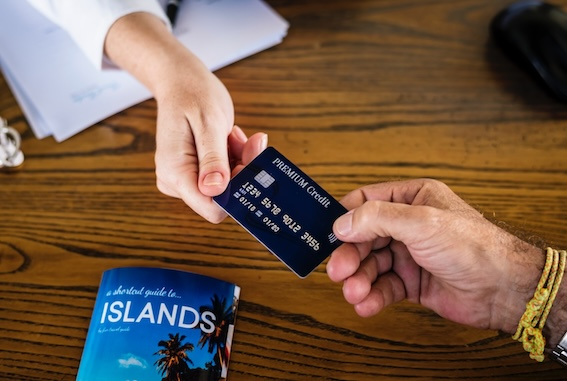

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load dataset
cc_apps = pd.read_csv("/kaggle/input/predicting-credit-card-approvals/cc_approvals.data", header=None)

# Replace the '?'s with NaN in dataset
cc_apps_nans_replaced = cc_apps.replace("?", np.NaN)

# Create a copy of the NaN replacement DataFrame
cc_apps_imputed = cc_apps_nans_replaced.copy()

# Iterate over each column of cc_apps_nans_replaced and impute the most frequent value for object data types and the mean for numeric data types
for col in cc_apps_imputed.columns:
    # Check if the column is of object type
    if cc_apps_imputed[col].dtypes == "object":
        # Impute with the most frequent value
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(
            cc_apps_imputed[col].value_counts().index[0]
        )
    else:
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(cc_apps_imputed[col].mean())

# Dummify the categorical features
cc_apps_encoded = pd.get_dummies(cc_apps_imputed, drop_first=True)

# Extract the last column as your target variable
X = cc_apps_encoded.iloc[:, :-1].values
y = cc_apps_encoded.iloc[:, [-1]].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

# Use logreg to predict instances from the training set
y_train_pred = logreg.predict(rescaledX_train)

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_train, y_train_pred))

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_train_score, best_train_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_train_score, best_train_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
best_score =  best_model.score(rescaledX_test, y_test)

print("Accuracy of logistic regression classifier: ", best_score)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[[203   1]
 [  1 257]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best: 0.818163 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.793859649122807


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
